# Exercise 3
Ole Gunnar Hovland, Jan Haakon Trabski and Alexander Hatle

# 1a)

In [148]:
%matplotlib inline
import numpy as np
import time
import matplotlib.pyplot as plt
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
from matplotlib import cm
plt.rcParams.update(newparams)

In [149]:
# Handed out code
def plot_solution(x, t, U, txt='Solution'):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    T, X = np.meshgrid(t,x)
    # ax.plot_wireframe(T, X, U)
    ax.plot_surface(T, X, U, cmap=cm.coolwarm)
    ax.view_init(azim=30)              # Rotate the figure
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title(txt);

In [150]:
def tridiag(v, d, w, N):
    # Help function 
    # Returns a tridiagonal matrix A=tridiag(v, d, w) of dimension N x N.
    # Modified to take vectors as input
    e = np.ones(N)        # array [1,1,...,1] of length N
    A = np.diag(v * e[1:],-1) + np.diag(d * e) + np.diag(w *e[1:],1)
    return A

In [151]:
def CN(g, f, BCs, params, M, N, R, T):
    # Input: 
    #       g: initial function for t=0
    #       f: RHS
    #       params: a list containing parameters: sigma, r, c and K
    #       BCs: list of two arrays with Dirichlet conds, first is at x = 0, second at x = R       
    #       M, N: number of grid intervals in the x- and t directions
    #       T: end of integration
    #       R: end of x
    # Output: 
    #       x, t: the gridpoints in the x- and t- directions 
    #       U: An array with the numerical solution.

    

    # Set the stepsizes
    h = R/M     # Stepsize in space
    k = T/N     # Stepsize in time

    # Parameters
    sigma = params[0]
    r = params[1]
    c = params[2]
    K = params[3]

    # Helping parameters
    alpha = sigma**2 * k / (4 * h**2)
    beta = r * k / (4*h)
    gamma = c * k / 2

    # Print the stepsizes, and r=k/h^2.
    #print('h={:.4f}, k={:.4f}'.format(h,k))

    U = np.zeros((M+1,N+1))    # Array to store the solution, boundaries included.
    x = np.linspace(0,R,M+1)   # Gridpoints on the x-axis
    t = np.linspace(0,T,N+1)   # Gridpoints on the t-axis
    U[:, 0] = g(x)              # Initial values, endpoints included

    # Boundary
    U[0, :] = BCs[0]
    U[-1, :] = BCs[1]
    
    # Constructing C
    lowdiag = -alpha * x[2:-1]**2 - beta * x[2:-1]         # M-2
    diag =  2 * alpha * x[1:-1]**2 + gamma                 # M-1
    updiag = -alpha * x[1:-2]**2 + beta * x[1:-2]          # M-2
    C = tridiag(lowdiag, diag, updiag, M-1)

    # Constructing A and B
    A = np.eye(M-1) + C
    B = np.eye(M-1) - C
    

    # Constructing p and q
    p = np.zeros(M-1)
    q = np.zeros(M-1)
    
    # Main loop 
    for n in range(N):
        # Updating p and q
        p[0] = (-alpha * x[1]**2 - beta * x[1]) * U[0,n+1]
        p[-1] = (-alpha * x[-2]**2 + beta * x[-2]) * U[-1,n+1]
        q[0] = (alpha * x[1]**2 + beta * x[1]) * U[0,n]
        q[-1] = (alpha * x[-2]**2 - beta * x[-2]) * U[-1,n]

        # Solving linear system
        tempvec = B.dot(U[1:-1, n]) + q - p + k * (f(x, t[n]) + f(x, t[n+1]))/2
        U[1:-1, n+1] = np.linalg.solve(A, tempvec)  # [1:-1] -> excluding endpoints
    return x, t, U

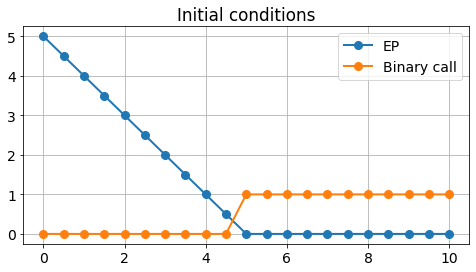

In [152]:
def european_put(x, K):
    sol = K-x
    sol[sol < 0] = 0
    return sol
def binary_call(x, K):
    sol = x-K
    sol[sol >= 0] = 1
    sol[sol < 0] = 0
    return sol

x = np.linspace(0, 10, 21)
K = 5
plt.title('Initial conditions')
plt.plot(x, european_put(x, K), '-o', label = 'EP')
plt.plot(x, binary_call(x, K), '-o', label = 'Binary call')
plt.legend()
plt.show()

50


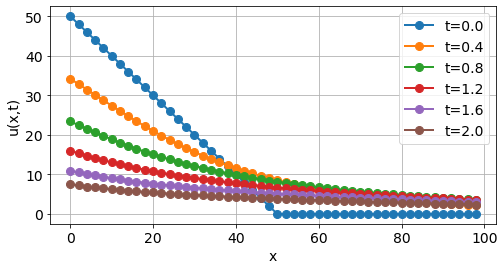

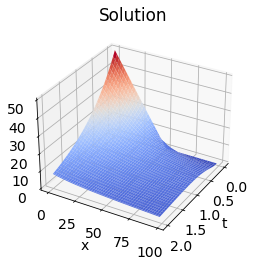

In [153]:
T = 2
R = 200
M = 100
N = 100

sigma = 1
r = 0.01
c = 0.95
K = 50
params = [sigma, r, c, K]

x = np.linspace(0,R,M+1)
t = np.linspace(0,T,N+1)

init = 'EP'
if init == 'binary':
    def g(x):
        return binary_call(x, K)
    BC0 = 0 * t
    plot_from = int(K*M/R * 0.5)
    plot_to = int(K*M/R * 1.5)
    
elif init == 'EP':
    def g(x):
        return european_put(x, K)
    BC0 = K * np.exp(-c * t)

    plot_from = 0
    plot_to = int(K*M/R * 2)
    print(plot_to)
    
BCR = g(np.repeat(R, N+1))      # u(R, t) = u(R, 0)
BCs = [BC0, BCR]

def f(x, t):
    return 0 * t

x, t, U = CN(g, f, BCs, params, M, N, R, T)


plt.figure(1)
plt.clf()
tplots = np.linspace(0,t[-1],6)
k = t[1]-t[0]
for tn in tplots:
    n = int(tn/k)
    tn = n*k
    plt.plot(x[plot_from:plot_to],U[plot_from:plot_to,n],'-o',label='t={:.1f}'.format(tn))
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.show()
# Make a 3-d plot
plot_solution(x[plot_from:plot_to], t, U[plot_from:plot_to, :], txt='Solution')


# 1e)

In [154]:
def u_exact(x, t):
    return (1 + t) * x**2
def u0(x):
    return x**2

In [155]:
sigma = 0.1
r = 0.2
c = 0.5
K = 10
params = [sigma, r, c, K]

T = 0.1
R = 80
M = 500
N = 500

x = np.linspace(0,R,M+1)
t = np.linspace(0,T,N+1)

def f(x, t):
    return (1+t) * x[1:-1]**2 * (1/(1 + t) - sigma**2 + 2*r + c)

BC0 = 0 * t
BCR = R**2 * (1 + t)
BCs = [BC0, BCR]


x, t, U = CN(u0, f, BCs, params, M, N, R, T)
#x, t, U = crank_modified(g = u0, params = params, T = 0.1, R = 80, M = 500, N = 500)

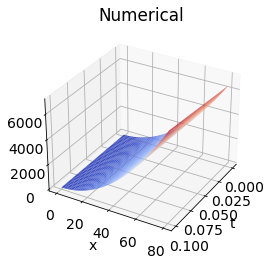

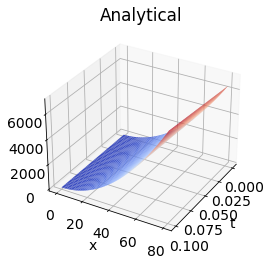

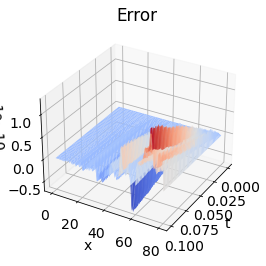

In [156]:
plot_solution(x, t, U, txt = 'Numerical')
tt, xx = np.meshgrid(t, x)
plot_solution(x, t, u_exact(xx, tt), txt = 'Analytical')
plot_solution(x, t, U - u_exact(xx, tt), txt = 'Error')

## Error as a function of h

In [157]:
def error_analysis(g, exact, Ms, Ns, R, T, solver, params):
    i = 0
    error = np.zeros(max(Ms.size, Ns.size))
    for M in Ms:
        for N in Ns:
            x, t, U = solver(g = g, params = params, M = M, N = N, R = R, T = T)
            tt, xx = np.meshgrid(t, x)
            error[i]= np.max(np.abs(exact(x, t[-1]) - U[:,-1]))
            i += 1
    return error

In [158]:
def error_analysis(g, f, boundary, exact, params, Ms, Ns, R, T):
    i = 0
    error = np.zeros(max(Ms.size, Ns.size))
    for M in Ms:
        for N in Ns:
            t = np.linspace(0,T,N+1)
            BCs = boundary(t)
            x, t, U = CN(g, f, BCs, params, M, N, R, T)
            tt, xx = np.meshgrid(t, x)
            error[i]= np.max(np.abs(exact(x, t[-1]) - U[:,-1]))
            i += 1
    return error

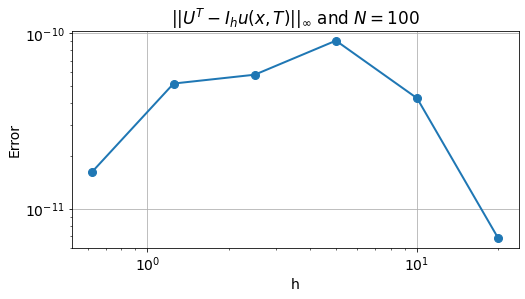

In [159]:
T = 0.1
R = 80
N = 100
Ns = np.array([N])
numpoints = 6                   
Ms = 2**(np.arange(2, numpoints + 2))     
hs = R / Ms

sigma = 0.1
r = 0.2
c = 0.5
K = 10
params = [sigma, r, c, K]

def f(x, t):
        return (1+t) * x[1:-1]**2 * (1/(1 + t) - sigma**2 + 2*r + c)

def boundary(t):
        BC0 = 0 * t
        BCR = R**2 * (1 + t)
        BCs = [BC0, BCR]
        return BCs
        
#error_h = error_analysis(u0, u_exact, Ms, Ns, R, T, crank_modified, params)
error_h = error_analysis(u0, f, boundary, u_exact, params, Ms, Ns, R, T)

plt.figure(0)
plt.loglog(hs, error_h, '-o')
plt.xlabel('h')
plt.ylabel('Error')
plt.title(r'$||U^T-I_hu(x,T)||_\infty$ and ' + rf'$N={N}$')
plt.show()

Somehow we get that the error stays constant as a function of h (actually decreasing!). Obviously, this is wrong. Reason for the error decreasing is that when we take larger step sizes, we "skip" over the part with the largest error. 

Still, the error should not be constant as a function of h??

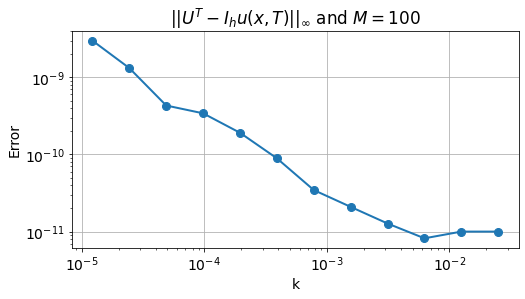

In [160]:
# Cell above needs to be run before this cell
num = 12
Ns = 2**np.arange(2, num + 2)
ks = T/Ns
num = 6
M = 100
Ms = np.array([M])

error_k = error_analysis(u0, f, boundary, u_exact, params, Ms, Ns, R, T)

plt.figure(0)
plt.loglog(ks, error_k, '-o')
plt.xlabel('k')
plt.ylabel('Error')
plt.title(r'$||U^T-I_hu(x,T)||_\infty$ and ' + rf'$M={M}$')
plt.show()

In [161]:
def u2_exact(x, t):
    return np.sin(np.pi * x / R) * np.exp(-t)

def u2_0(x):
    return np.sin(np.pi * x / R)

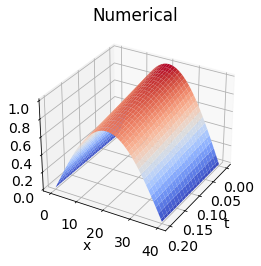

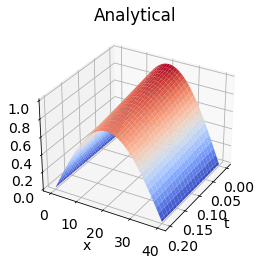

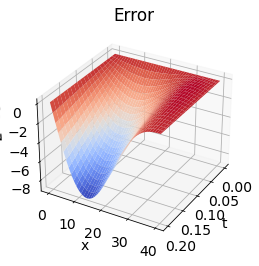

In [162]:
sigma = 0.8
r = 0.01
c = 0.5
K = 10
params = [sigma, r, c, K]

T = 0.2
R = 40
M = 400
N = 20

x = np.linspace(0,R,M+1)
t = np.linspace(0,T,N+1)

def f(x, t):
    #return 3 * (1 + t**3) * x[1:-1]**3 * (t**2/(1 + t**3) - sigma**2 + r + c/3)
    return np.sin(np.pi * x[1:-1] / R) * np.exp(-t) * (-1 + (np.pi * sigma * x[1:-1] / R)**2 / 2 + c) \
        + (r * x[1:-1] * np.pi / R) * np.cos(np.pi * x[1:-1] / R) * np.exp(-t)

BC0 = 0 * t
BCR = 0 * t
BCs = [BC0, BCR]

x, t, U = CN(u2_0, f, BCs, params, M, N, R, T)

plot_solution(x, t, U, txt = 'Numerical')
tt, xx = np.meshgrid(t, x)
plot_solution(x, t, u2_exact(xx, tt), txt = 'Analytical')
plot_solution(x, t, U - u2_exact(xx, tt), txt = 'Error')

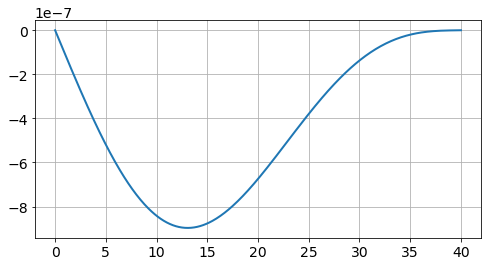

In [163]:
# Error is in magnitude 1e-7, as shown here: (magnitude is hidden in the plot above for some reason?) 
plt.plot(x, U[:,-1] - u2_exact(xx, tt)[:,-1])

### As function of $h$ and $k$

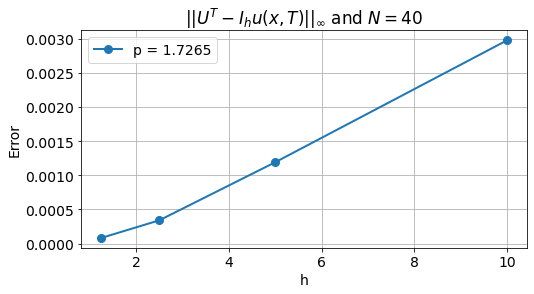

In [164]:
T = 0.1
R = 40
N = 40
Ns = np.array([N])
numpoints = 4
Ms = 2**(np.arange(2, numpoints + 2))     
hs = R / Ms


sigma = 0.1
r = 0.2
c = 0.5
K = 10
params = [sigma, r, c, K]

def f(x, t):
    #return 3 * (1 + t**3) * x[1:-1]**3 * (t**2/(1 + t**3) - sigma**2 + r + c/3)
    return np.sin(np.pi * x[1:-1] / R) * np.exp(-t) * (-1 + (np.pi * sigma * x[1:-1] / R)**2 / 2 + c) \
        + (r * x[1:-1] * np.pi / R) * np.cos(np.pi * x[1:-1] / R) * np.exp(-t)

def boundary(t):
    BC0 = 0 * t
    BCR = 0 * t
    BCs = [BC0, BCR]
    return BCs

#error_h = error_analysis(u2_0, u2_exact, Ms, Ns, R, T, crank_modified_again, params)
error_h = error_analysis(u2_0, f, boundary, u2_exact, params, Ms, Ns, R, T)

order = np.polyfit(np.log(hs),np.log(error_h), 1)[0]

plt.figure(0)
plt.plot(hs, error_h, '-o', label = 'p = {:.4f}'.format(order))
plt.xlabel('h')
plt.ylabel('Error')
plt.title(r'$||U^T-I_hu(x,T)||_\infty$ and ' + rf'$N={N}$')
plt.legend()
plt.show()

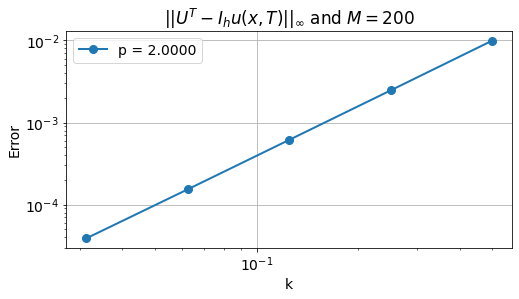

In [165]:
T = 1
R = 40
num = 5    
Ns = 2**np.arange(1, num+1)
M = 200               
Ms = np.array([M])
ks = T / Ns

error_k = error_analysis(u2_0, f, boundary, u2_exact, params, Ms, Ns, R, T)
order = np.polyfit(np.log(ks),np.log(error_k), 1)[0]

plt.figure(0)
plt.loglog(ks, error_k, '-o', label = 'p = {:.4f}'.format(order))
plt.xlabel('k')
plt.ylabel('Error')
plt.title(r'$||U^T-I_hu(x,T)||_\infty$ and ' + rf'$M={M}$')
plt.legend()
plt.show()

### old functions

In [166]:
def crank(g, params, BC, M=10, N=100, R = 1, T=0.5):
    # Input: 
    #       g: initial function for t=0
    #       M, N: number of grid intervals in the x- and t directions
    #       T: end of integration
    # Output: 
    #       x, t: the gridpoints in the x- and t- directions 
    #       U: An array with the numerical solution.

    

    # Set the stepsizes
    h = R/M     # Stepsize in space
    k = T/N     # Stepsize in time

    # Parameters
    sigma = params[0]
    r = params[1]
    c = params[2]
    K = params[3]

    # Helping parameters
    alpha = sigma**2 * k / (4 * h**2)
    beta = r * k / (4*h)
    gamma = c * k / 2

    # Print the stepsizes, and r=k/h^2.
    print('h={:.4f}, k={:.4f}'.format(h,k))

    U = np.zeros((M+1,N+1))    # Array to store the solution, boundaries included.
    x = np.linspace(0,R,M+1)   # Gridpoints on the x-axis
    t = np.linspace(0,T,N+1)   # Gridpoints on the t-axis
    U[:,0] = g(x, K)              # Initial values, endpoints included
    
    # Constructing C
    lowdiag = -alpha * x[2:-1]**2 - beta * x[2:-1]         # M-2
    diag =  2 * alpha * x[1:-1]**2 + gamma                 # M-1
    updiag = -alpha * x[1:-2]**2 + beta * x[1:-2]          # M-2
    C = tridiag(lowdiag, diag, updiag, M-1)

    # Constructing A and B
    A = np.eye(M-1) + C
    B = np.eye(M-1) - C

    # Boundary functions, bnddry0 = u(0, t), bndryR = u(R, t)
    if BC == 'EP':
        U[0, :] = K * np.exp(-c * t)
    elif BC == 'binary':
        U[0, :] = 0 * t
    
    # u(R,t) = u(R, 0)
    U[-1, :] = np.repeat(U[-1, 0], N+1)

    # Constructing p and q
    p = np.zeros(M-1)
    q = np.zeros(M-1)
    

    # Main loop 
    for n in range(N):
        # Updating p and q
        p[0] = (-alpha * x[1]**2 - beta * x[1]) * U[0,n+1]
        p[-1] = (-alpha * x[-2]**2 + beta * x[-2]) * U[-1,n+1]
        q[0] = (alpha * x[1]**2 + beta * x[1]) * U[0,n]
        q[-1] = (alpha * x[-2]**2 - beta * x[-2]) * U[-1,n]

        # Solving linear system
        U[1:-1, n+1] = np.linalg.solve(A, B.dot(U[1:-1, n]) + q - p )  # [1:-1] -> excluding endpoints
    return x, t, U

In [167]:
def crank_modified(g, params, M=10, N=100, R = 1, T=0.5):
    # Input: 
    #       g: initial function for t=0
    #       params: a list containing parameters
    #               sigma, r, c and K
    #       M, N: number of grid intervals in the x- and t directions
    #       T: end of integration
    # Output: 
    #       x, t: the gridpoints in the x- and t- directions 
    #       U: An array with the numerical solution.

    

    # Set the stepsizes
    h = R/M     # Stepsize in space
    k = T/N     # Stepsize in time

    # Parameters
    sigma = params[0]
    r = params[1]
    c = params[2]
    K = params[3]

    # Helping parameters
    alpha = sigma**2 * k / (4 * h**2)
    beta = r * k / (4*h)
    gamma = c * k / 2

    # Print the stepsizes, and r=k/h^2.
    print('h={:.4f}, k={:.4f}'.format(h,k))

    U = np.zeros((M+1,N+1))    # Array to store the solution, boundaries included.
    x = np.linspace(0,R,M+1)   # Gridpoints on the x-axis
    t = np.linspace(0,T,N+1)   # Gridpoints on the t-axis
    U[:,0] = g(x)              # Initial values, endpoints included

    # Boundary
    U[0, :] = 0
    U[-1, :] = R**2 * (1 + t)
    
    # Constructing C
    lowdiag = -alpha * x[2:-1]**2 - beta * x[2:-1]         # M-2
    diag =  2 * alpha * x[1:-1]**2 + gamma                 # M-1
    updiag = -alpha * x[1:-2]**2 + beta * x[1:-2]          # M-2
    C = tridiag(lowdiag, diag, updiag, M-1)

    # Constructing A and B
    A = np.eye(M-1) + C
    B = np.eye(M-1) - C

    # Boundary functions, bnddry0 = u(0, t), bndryR = u(R, t)
    

    # Constructing p and q
    p = np.zeros(M-1)
    q = np.zeros(M-1)
    # RHS
    def f(t):
        return (1+t) * x[1:-1]**2 * (1/(1 + t) - sigma**2 + 2*r + c)

    # Main loop 
    for n in range(N):
        # Updating p and q
        p[0] = (-alpha * x[1]**2 - beta * x[1]) * U[0,n+1]
        p[-1] = (-alpha * x[-2]**2 + beta * x[-2]) * U[-1,n+1]
        q[0] = (alpha * x[1]**2 + beta * x[1]) * U[0,n]
        q[-1] = (alpha * x[-2]**2 - beta * x[-2]) * U[-1,n]

        tempvec = B.dot(U[1:-1, n]) + q - p + k * (f(t[n]) + f(t[n+1]))/2
        U[1:-1, n+1] = np.linalg.solve(A, tempvec)  # [1:-1] -> excluding endpoints
        
    return x, t, U

In [168]:
def crank_modified_again(g, params, M=10, N=100, R = 1, T=0.5):
    # Input: 
    #       g: initial function for t=0
    #       params: a list containing parameters
    #               sigma, r, c and K
    #       M, N: number of grid intervals in the x- and t directions
    #       T: end of integration
    # Output: 
    #       x, t: the gridpoints in the x- and t- directions 
    #       U: An array with the numerical solution.

    

    # Set the stepsizes
    h = R/M     # Stepsize in space
    k = T/N     # Stepsize in time

    # Parameters
    sigma = params[0]
    r = params[1]
    c = params[2]
    K = params[3]

    # Helping parameters
    alpha = sigma**2 * k / (4 * h**2)
    beta = r * k / (4*h)
    gamma = c * k / 2

    # Print the stepsizes, and r=k/h^2.
    print('h={:.4f}, k={:.4f}'.format(h,k))
    print('r={:.4f}, h*sigma^2={:.4f}'.format(r, h * sigma**2))

    U = np.zeros((M+1,N+1))    # Array to store the solution, boundaries included.
    x = np.linspace(0,R,M+1)   # Gridpoints on the x-axis
    t = np.linspace(0,T,N+1)   # Gridpoints on the t-axis
    U[:,0] = g(x)              # Initial values, endpoints included

    # Boundary
    U[0, :] = 0
    U[-1, :] = 0 #x[-1]**3 * (1 + t**3)
    
    # Constructing C
    lowdiag = -alpha * x[2:-1]**2 - beta * x[2:-1]         # M-2
    diag =  2 * alpha * x[1:-1]**2 + gamma                 # M-1
    updiag = -alpha * x[1:-2]**2 + beta * x[1:-2]          # M-2
    C = tridiag(lowdiag, diag, updiag, M-1)

    # Constructing A and B
    A = np.eye(M-1) + C
    B = np.eye(M-1) - C

    # Boundary functions, bnddry0 = u(0, t), bndryR = u(R, t)
    

    # Constructing p and q
    p = np.zeros(M-1)
    q = np.zeros(M-1)

    
    # RHS
    def f(t):
        #return 3 * (1 + t**3) * x[1:-1]**3 * (t**2/(1 + t**3) - sigma**2 + r + c/3)
        return np.sin(np.pi * x[1:-1] / R) * np.exp(-t) * (-1 + (np.pi * sigma * x[1:-1] / R)**2 / 2 + c) \
            + (r * x[1:-1] * np.pi / R) * np.cos(np.pi * x[1:-1] / R) * np.exp(-t)
        

    # Main loop 
    for n in range(N):
        # Updating p and q
        p[0] = (-alpha * x[1]**2 - beta * x[1]) * U[0,n+1]
        p[-1] = (-alpha * x[-2]**2 + beta * x[-2]) * U[-1,n+1]
        q[0] = (alpha * x[1]**2 + beta * x[1]) * U[0,n]
        q[-1] = (alpha * x[-2]**2 - beta * x[-2]) * U[-1,n]

        tempvec = B.dot(U[1:-1, n]) + q - p + k * (f(t[n]) + f(t[n+1])) / 2
        U[1:-1, n+1] = np.linalg.solve(A, tempvec)  # [1:-1] -> excluding endpoints
        
    return x, t, U